# Actividad 2: Métodos, atributos y operaciones con pandas

En orden de tomar destreza con los DF y la libreria pandas y asociados y manipular con confianza se realizaran varias operaciones con estos. <i> comandos sacados de becomingHumanCheatSheet.pdf </i>

<b>1)</b> Creación manual de DF y series (S), eliminar elementos (drop), ordenar y rankear, mostrar info

<b>2)</b> Getting, Selecting y Setting

<b>3)</b> Alineamiento y aplicación de funciones

<b>4)</b> Lectura y escritura de data externa

<b>5)</b> Estructura de data Pandas, pivot y melt

<b>6)</b> Indexado avanzado

<b>7)</b> Duplicación, agrupación, combinación de data, data perdida

<b>8)</b> Fechas, visualización sencilla

<h2>_____________________________________________________________________________</h2>

<b>1)</b> Creación manual de DF y series (S), eliminar elementos (drop), ordenar y rankear, mostrar info:

In [1]:
import pandas as pd #importamos el paquete que ya está instalado con Anaconda
import numpy as np #modulo de numpy para matematicas

In [2]:
s=pd.Series(["hola",2,3.44,-44,2],index=['a','b','c','d','e']) #se crea una serie s con el metódo Series, los indices pueden ser letras
s

a    hola
b       2
c    3.44
d     -44
e       2
dtype: object

In [3]:
type(s) #una variable tipo serie

pandas.core.series.Series

In [4]:
data={'pais':['belgica','india','venezuela'],
        'capital':['bruselas','nueva delhi','caracas'],
         'población':[18156,1456,146]}
df=pd.DataFrame(data,columns=['pais','capital','población'])

df  #la data agrega a el metodo DataFrame, atencio que los métodos usa CamelCase, las columnas en dota y en columns deben ser =


,pais,capital,población
0,belgica,bruselas,18156
1,india,nueva delhi,1456
2,venezuela,caracas,146


In [5]:
type(data) # la data es un diccionario


dict

In [6]:
df.info() #var tipo DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
pais         3 non-null object
capital      3 non-null object
población    3 non-null int64
dtypes: int64(1), object(2)
memory usage: 88.0+ bytes


In [7]:
s.drop(['a','b']) #se elminina dos filas mediante rango del indice

c    3.44
d     -44
e       2
dtype: object

In [8]:
df.drop('pais',axis=1) #se elimina fijando col y eligiendo el eje dimensional (por si hay un df Ndimensional)

,capital,población
0,bruselas,18156
1,nueva delhi,1456
2,caracas,146


In [9]:
df.sort_index() #ordenamos por indice dah!

,pais,capital,población
0,belgica,bruselas,18156
1,india,nueva delhi,1456
2,venezuela,caracas,146


In [10]:
df.sort_values(by='capital') #ordenamos por columna. fijasrse que los metodos se separan con _

,pais,capital,población
0,belgica,bruselas,18156
2,venezuela,caracas,146
1,india,nueva delhi,1456


In [11]:
df.rank() #asigna valores a las entradas.

,pais,capital,población
0,1.0,1.0,3.0
1,2.0,3.0,2.0
2,3.0,2.0,1.0


In [12]:
df.shape #atributo de forma de la matriz RowxCol

(3, 3)

In [13]:
df.index #atributo para de indices como un rango de la matriz

RangeIndex(start=0, stop=3, step=1)

In [14]:
df.columns # atributo de columnas de matriz, fijarse que los atributos se muestran en minuscula

Index(['pais', 'capital', 'población'], dtype='object')

In [15]:
df.info() #método para mostrar info de la matriz

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
pais         3 non-null object
capital      3 non-null object
población    3 non-null int64
dtypes: int64(1), object(2)
memory usage: 88.0+ bytes


In [16]:
df.count() #método para saber la cant de elemnentos

pais         3
capital      3
población    3
dtype: int64

In [17]:
type(df['pais']) #una columna de un df es una serie

pandas.core.series.Series

In [18]:
df.sum() #suma o concatena (si son str) las las col

pais              belgicaindiavenezuela
capital      bruselasnueva delhicaracas
población                         19758
dtype: object

In [19]:
df.sum()

pais              belgicaindiavenezuela
capital      bruselasnueva delhicaracas
población                         19758
dtype: object

In [20]:
data2={'pais':['belgica','india','venezuela'],
        'capital':[1,'nueva delhi','caracas'],
         'población':[18156,1456,146]}
df2=pd.DataFrame(data2,columns=['pais','capital','población'])
df2.sum() #si son de dif tipos esa col no se omite

pais         belgicaindiavenezuela
población                    19758
dtype: object

In [21]:
df.cumsum() #suma acumalativa

,pais,capital,población
0,belgica,bruselas,18156
1,belgicaindia,bruselasnueva delhi,19612
2,belgicaindiavenezuela,bruselasnueva delhicaracas,19758


In [22]:
df.min() #el srtr más equeño y el int menor de cada col

pais          belgica
capital      bruselas
población         146
dtype: object

In [23]:
df.describe() #describe estadisticamente al df, las col con str se ignoran


,población
count,3.000000
mean,6586.000000
std,10041.299717
min,146.000000
25%,801.000000
50%,1456.000000
75%,9806.000000
max,18156.000000


In [24]:
df.mode() #calcula la moda estadistica

,pais,capital,población
0,belgica,bruselas,146
1,india,caracas,1456
2,venezuela,nueva delhi,18156


<h2>_____________________________________________________________________________</h2>


<b>2)</b> Getting, Selecting y Setting:

In [25]:
s['b'] #data por indice

2

In [26]:
s[0] # data por rango INDICE EMPIEZA EN 0

'hola'

In [27]:
df[2:3] #rango para mostrar el tercer elemento, indice 2. un rango a:b toma desde el A hasta hasta el anterior a B

,pais,capital,población
2,venezuela,caracas,146


In [28]:
df[2:2] #no es un rango vacio

,pais,capital,población


<b> Selección por Posición:</b>

In [29]:
df.iloc[[0],[1]] #fila 0,  col 1

,capital
0,bruselas


<b> Selección por Etiqueta:</b>

In [30]:
df.loc[[0],['capital']] #fila 0, col Capital. las filas seguiran siendo numerico

,capital
0,bruselas


<b> Selección por Posición/Etiqueta: DEPRECADO</b> 


In [31]:
df.ix[1] #DEPRECADO

C:\Users\Implacable\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


pais               india
capital      nueva delhi
población           1456
Name: 1, dtype: object

<b> Selección por indexado Booleano:</b> 

In [32]:
df[df['población']>400] #seleccionamos con operadores logicos

,pais,capital,población
0,belgica,bruselas,18156
1,india,nueva delhi,1456


In [33]:
s['a']=33 #asignamos un nuevo valor
s


a      33
b       2
c    3.44
d     -44
e       2
dtype: object

In [34]:
df.iloc[[0],[0]]="BELGICA_ok" #asignacion (setting) en DF
df


,pais,capital,población
0,BELGICA_ok,bruselas,18156
1,india,nueva delhi,1456
2,venezuela,caracas,146


In [35]:
s[~(s < -1) & (s < 3)] # seleccion con mult operadoes (~ es NOT)

b    2
e    2
dtype: object

<h2>_____________________________________________________________________________</h2>

<b>3)</b> Alineamiento y aplicación de funciones:

In [36]:
f =lambda x:x*2  #crear funcion instantaneta lambda

df.apply(f) #aplicamos a la matriz


,pais,capital,población
0,BELGICA_okBELGICA_ok,bruselasbruselas,36312
1,indiaindia,nueva delhinueva delhi,2912
2,venezuelavenezuela,caracascaracas,292


In [37]:
df.applymap(f)  #aplicamos elementoxElemento

,pais,capital,población
0,BELGICA_okBELGICA_ok,bruselasbruselas,36312
1,indiaindia,nueva delhinueva delhi,2912
2,venezuelavenezuela,caracascaracas,292


In [38]:
s2 = pd.Series([7, -2, 3], index=['a', 'c', 'd']) #NaN se colocan en los indices que no se solapan en las dos series o df
s+s2

a      40
b     NaN
c    1.44
d     -41
e     NaN
dtype: object

In [39]:
s.add(s2,fill_value=0) #sumamos agregando 0 a la segunaa serie donde haga falta

a      40
b       2
c    1.44
d     -41
e       2
dtype: object

In [40]:
s.sub(s2, fill_value=2) #restamos con s2.b y s2.e = a 2

a      26
b       0
c    5.44
d     -47
e       0
dtype: object

<h2>_____________________________________________________________________________</h2>

<b>4)</b> Lectura y escritura de data externa:

In [41]:
import random as rd

In [42]:
hoja1=pd.read_csv('l2.csv',header=0,nrows=10) #leemos el archivo, la primera fila 0 es el header y leemos 10 filas

In [43]:
hoja1

,numero,fecha,op,balance
0,0,01/01/2018,sell,101
1,1,02/01/2018,buy,105
2,2,03/01/2018,buy,110
3,3,04/01/2018,buy,140
4,4,05/01/2018,sell,90
5,5,06/01/2018,buy,200
6,6,07/01/2018,sell,150
7,7,08/01/2018,sell,300
8,8,09/01/2018,buy,10
9,9,10/01/2018,buy,1000


In [44]:
hoja1.info() # es clase Df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
numero     10 non-null int64
fecha      10 non-null object
op         10 non-null object
balance    10 non-null int64
dtypes: int64(2), object(2)
memory usage: 280.0+ bytes


In [45]:
i = 1
while i <= len(hoja1):
    hoja1.loc[i-1,'op']=rd.choice(['SELL', 'BUY']) 
    i += 1

hoja1  #se colocan cambian las operaciones al azar, la asignacion de be ser con iloc o con loc

,numero,fecha,op,balance
0,0,01/01/2018,SELL,101
1,1,02/01/2018,BUY,105
2,2,03/01/2018,SELL,110
3,3,04/01/2018,BUY,140
4,4,05/01/2018,SELL,90
5,5,06/01/2018,SELL,200
6,6,07/01/2018,SELL,150
7,7,08/01/2018,BUY,300
8,8,09/01/2018,SELL,10
9,9,10/01/2018,BUY,1000


In [46]:
hoja1.to_csv('l2-modificado-con-python.csv') #gaurdamos el archivo modificado

In [47]:
hoja2=pd.read_excel('l1.xlsx') #detecta automaticamente los headers
hoja2

,numero,fecha,op,balance
0,0,2018-01-01,sell,101
1,1,2018-01-02,buy,105
2,2,2018-01-03,buy,110
3,3,2018-01-04,buy,140
4,4,2018-01-05,sell,90
5,5,2018-01-06,buy,200
6,6,2018-01-07,sell,150
7,7,2018-01-08,sell,300
8,8,2018-01-09,buy,10
9,9,2018-01-10,buy,1000


In [48]:
i=1

while i <= len(hoja2):
    hoja2.iloc[i-1,2]=rd.choice(["buena","muy_buena","mala", "muy_mala"])
    i+= 1

hoja2

,numero,fecha,op,balance
0,0,2018-01-01,mala,101
1,1,2018-01-02,mala,105
2,2,2018-01-03,buena,110
3,3,2018-01-04,mala,140
4,4,2018-01-05,muy_mala,90
5,5,2018-01-06,muy_buena,200
6,6,2018-01-07,muy_buena,150
7,7,2018-01-08,muy_buena,300
8,8,2018-01-09,muy_mala,10
9,9,2018-01-10,mala,1000


In [49]:
hoja2.to_excel("escribeme2.xlsx") # creamos y guardamos en el mismo dir

<h2>_____________________________________________________________________________</h2>

<b>5)</b> Estructura de data Pandas, pivot y melt:


In [50]:
df2=df
df2.pivot(index='pais',columns='capital',values='población') #transforma la matriz cambiando el indice y las filas y col

capital,bruselas,caracas,nueva delhi
pais,,,
BELGICA_ok,18156.0,NaN,NaN
india,NaN,NaN,1456.0
venezuela,NaN,146.0,NaN


Evidentemente, si la relacion no es relacional y no hay valores entre algun par quedara vacio.

In [51]:
df

,pais,capital,población
0,BELGICA_ok,bruselas,18156
1,india,nueva delhi,1456
2,venezuela,caracas,146


In [52]:
df3 = pd.DataFrame({"A": ["foo", "foo", "foo", "foo", "foo",
...                          "bar", "bar", "bar", "bar"],
...                    "B": ["one", "one", "one", "two", "two",
...                          "one", "one", "two", "two"],
...                    "C": ["small", "large", "large", "small",
...                          "small", "large", "small", "small",
...                          "large"],
...                    "D": [1, 2, 2, 3, 3, 4, 5, 6, 7],
...                    "E": [2, 4, 5, 5, 6, 6, 8, 9, 9]})
df3

,A,B,C,D,E
0,foo,one,small,1,2
1,foo,one,large,2,4
2,foo,one,large,2,5
3,foo,two,small,3,5
4,foo,two,small,3,6
5,bar,one,large,4,6
6,bar,one,small,5,8
7,bar,two,small,6,9
8,bar,two,large,7,9


In [53]:
table = pd.pivot_table(df3, values='D', index=['A', 'B'],
...                     columns=['C'],fill_value=0)
table

C        large  small
A   B                
bar one      4      5
    two      7      6
foo one      2      1
    two      0      3

Fijense como transforma los valores de D por clase y subclases, una forma muy interesante de representar la data, coloca indices nuevos y columnaas nuevas

In [54]:
pd.melt(df3, id_vars=['D'], value_vars=['A','B'], value_name='observation')

,D,variable,observation
0,1,A,foo
1,2,A,foo
2,2,A,foo
3,3,A,foo
4,3,A,foo
5,4,A,bar
6,5,A,bar
7,6,A,bar
8,7,A,bar
9,1,B,one


En este caso, converitimos las columnas en filas con .melt

<h2>_____________________________________________________________________________</h2>

<b>6)</b> Indexado avanzado

In [55]:
df4=pd.DataFrame(
                {"a":[1,2,3],
                "b":[4,5,6],
                "c":[7,8,9]},
            index=[1,2,3])
df4.loc[:,(df4>8).any()] #selecc cols con algun valor mayor a 8

,c
1,7
2,8
3,9


In [56]:
df4.loc[:,(df4>4).all()] #selecc las col con Todos sus valores mayores a 4

,c
1,7
2,8
3,9


In [57]:
df4.iloc[0,0]=None #asignamos valor nulo para probar lo sig
df4

,a,b,c
1,NaN,4,7
2,2.0,5,8
3,3.0,6,9


In [58]:
df4.loc[:,df4.isnull().any()] #selecc cols con algun valor Nulo
df4

,a,b,c
1,NaN,4,7
2,2.0,5,8
3,3.0,6,9


In [59]:
df4.iloc[0,0]=1
df5=pd.DataFrame({"a2":[1.0,2.0,3.1],"b":[0,99,88],"c":[67,76,66]},index=[1,2,3])
df5[(df5.a2.isin(df4.a))] # devuelve las filas en las que coinciden valores en ambos df

,a2,b,c
1,1.0,0,67
2,2.0,99,76


Nota: el comando distingue diferencias entre int y float, "1 != 1.0"

In [60]:
f5=pd.DataFrame({"a2":[1.0,2.0,3.1],"b":[0,99,88],"c":[67,76,66]},index=[1,2,3])
df5.filter(items=["a2"]) #filtrando


,a2
1,1.0
2,2.0
3,3.1


In [61]:
s.where(s<0).fillna(99999) # selecc los negativos y reemplazamos los demas

a    99999
b    99999
c    99999
d      -44
e    99999
dtype: int64

In [62]:
df4.query('a<b') #trae todas la observaciones donde se cumple la condicion

,a,b,c
1,1.0,4,7
2,2.0,5,8
3,3.0,6,9


In [63]:
df4=pd.DataFrame(
                {"a":[1,2,3],
                "b":[4,5,6],
                "c":[7,8,9]},
            index=[1,2,3])
df4.set_index("a") #cambiamos el indice del dt

,b,c
a,,
1,4,7
2,5,8
3,6,9


In [64]:
df4=df4.reset_index() #reseteamos el indice

In [65]:
df4


,index,a,b,c
0,1,1,4,7
1,2,2,5,8
2,3,3,6,9


In [66]:
df4=df4.reset_index() #agregamos un nivel adicional de indice
df4

,level_0,index,a,b,c
0,0,1,1,4,7
1,1,2,2,5,8
2,2,3,3,6,9


In [67]:
df4.set_index("a") #colocamos como indice base a una col

,level_0,index,b,c
a,,,,
1,0,1,4,7
2,1,2,5,8
3,2,3,6,9


In [68]:
df4.set_index("b") #colocamos como indice base a otra col

,level_0,index,a,c
b,,,,
4,0,1,1,7
5,1,2,2,8
6,2,3,3,9


In [69]:
df4=pd.DataFrame(
                {"a":[1,2,3],
                "b":[4,5,6],
                "c":[7,8,9]},
            index=[1,2,3])
df4=df4.rename(index=str,columns={"a": "a_asd_sd", "b": "cap", "c": "pob"})
df4 #cambiamos los nombres de las col

,a_asd_sd,cap,pob
1,1,4,7
2,2,5,8
3,3,6,9


In [70]:
 arrays = [[1,2,3],[5,4,3]]
df5= pd.DataFrame(np.random.rand(3, 2), index=arrays) 
df5 #lista con con dos listas adentro sirven de indice doble

,,0,1
1,5,0.248272,0.223354
2,4,0.656507,0.141943
3,3,0.371994,0.336047


<h2>_____________________________________________________________________________</h2>

<b>7)</b> Duplicación, agrupación, combinación de data, data perdida

In [71]:
tuples = list(zip(*arrays))
index = pd.MultiIndex.from_tuples(tuples,names=['first', 'second'])
df6 = pd.DataFrame(np.random.rand(3, 2), index=index)
df6 #multiple indice con dos listas en un array y metodo multiIndex

df5.iloc[1,0]=22
df5.iloc[2,1]=22
df5.iloc[1,1]=22
df5.iloc[0,0]=22
df5.duplicated(1) #muestar las onaservaciones duplicadas de una variable


1  5    False
2  4    False
3  3     True
dtype: bool

In [72]:
df4.groupby(by=["cap"],sort=True).mean() #agrupamos segun col

,a_asd_sd,pob
cap,,
4,1,7
5,2,8
6,3,9


In [73]:
df4.replace(4,9999) #reemplavando valores

,a_asd_sd,cap,pob
1,1,9999,7
2,2,5,8
3,3,6,9


In [74]:
df4.iloc[0,0]
df4.fillna(df4.mean()) #rellanamos el valor nulo con la media de la columna (la media de la Variable)

,a_asd_sd,cap,pob
1,1,4,7
2,2,5,8
3,3,6,9


In [75]:
df4.iloc[0,0]
df4.dropna() #eliminamos toda la fila (una observación), que tenia un valor nulo

,a_asd_sd,cap,pob
1,1,4,7
2,2,5,8
3,3,6,9


<h2>_____________________________________________________________________________</h2>

<b>8)</b> Fechas, visualización sencilla

In [76]:
df7=pd.DataFrame(
                {"a_asd_sd":[555,55,5],
                "b":[4,5,6],
                "c":[7,8,9]},
            index=[1,2,3])

pd.merge(df4,df7,how="outer",on="a_asd_sd") #merge o fusion de dos df con una col en comun como indice
#outer significa la union de las dos

,a_asd_sd,cap,pob,b,c
0,1,4.0,7.0,NaN,NaN
1,2,5.0,8.0,NaN,NaN
2,3,6.0,9.0,NaN,NaN
3,555,NaN,NaN,4.0,7.0
4,55,NaN,NaN,5.0,8.0
5,5,NaN,NaN,6.0,9.0


In [77]:
pd.concat([df4,df7],axis=1,join='outer') #concatenamiento  horizaontal, con union

,a_asd_sd,cap,pob,a_asd_sd,b,c
1,1.0,4.0,7.0,NaN,NaN,NaN
2,2.0,5.0,8.0,NaN,NaN,NaN
3,3.0,6.0,9.0,NaN,NaN,NaN
1,NaN,NaN,NaN,555.0,4.0,7.0
2,NaN,NaN,NaN,55.0,5.0,8.0
3,NaN,NaN,NaN,5.0,6.0,9.0


In [78]:
df7=pd.DataFrame(
                {"a":[555,55,5],
                "b":[4,5,6],
                "c":[7,8,9]},
            index=[1,2,3])
df4=pd.DataFrame(
                {"d":[0,115,1115],
                "f":[41,51,61],
                "g":[71,81,91]},
            index=[1,2,3])
pd.concat([df4,df7],axis=1,join='outer')

,d,f,g,a,b,c
1,0,41,71,555,4,7
2,115,51,81,55,5,8
3,1115,61,91,5,6,9


In [79]:
df7=pd.DataFrame(
                {"a":[56,55,5],
                "b":[4,5,6],
                "c":[7,8,9]},
            index=[1,2,3])
df4=pd.DataFrame(
                {"a":[56,115,1115],
                "f":[41,51,61],
                "g":[71,81,91]},
            index=[1,2,3])
pd.concat([df4,df7],axis=1,join='outer')

,a,f,g,a,b,c
1,56,41,71,56,4,7
2,115,51,81,55,5,8
3,1115,61,91,5,6,9


In [80]:
pd.merge(df4,df7,how="outer", on="a").groupby(by="a", sort=False).mean()

,f,g,b,c
a,,,,
56,41.0,71.0,4.0,7.0
115,51.0,81.0,NaN,NaN
1115,61.0,91.0,NaN,NaN
55,NaN,NaN,5.0,8.0
5,NaN,NaN,6.0,9.0


fusionamamos los dos df, en donde el valor de la col indice coincide, la fila esta completa. tambien agrupamos por la misma col a, en orden descendente excepto por la primera (la de 0) por ser el unico registro completo se mantiene de primera

In [81]:
df7['Date']=pd.date_range('2000-1-1',periods=3,freq='M')
df7

,a,b,c,Date
1,56,4,7,2000-01-31
2,55,5,8,2000-02-29
3,5,6,9,2000-03-31


In [82]:
df7=df7.set_index('Date')
df7

,a,b,c
Date,,,
2000-01-31,56,4,7
2000-02-29,55,5,8
2000-03-31,5,6,9


In [88]:
df4=pd.DataFrame(
                {"a":[0,115,1115],
                "f":[41,51,61],
                "g":[71,81,91]},
            index=[1,2,3])
df4['Date']=pd.date_range('2000-1-1', periods=3,freq='M')
df4=df4.set_index('Date')


In [89]:
df5=pd.merge(df4,df7,how='outer',on='Date').fillna(88)

In [90]:
df5 #se creo columna fecha para df4 y df7 se colocaron como indices y se fusionaron, ademas se rellenaron los nulos

,a_x,f,g,a_y,b,c
Date,,,,,,
2000-01-31,0,41,71,56,4,7
2000-02-29,115,51,81,55,5,8
2000-03-31,1115,61,91,5,6,9


In [91]:
df98=pd.concat([df4,df7],axis=1)

In [93]:
df98 #se concatena

,a,f,g,a,b,c
Date,,,,,,
2000-01-31,0,41,71,56,4,7
2000-02-29,115,51,81,55,5,8
2000-03-31,1115,61,91,5,6,9


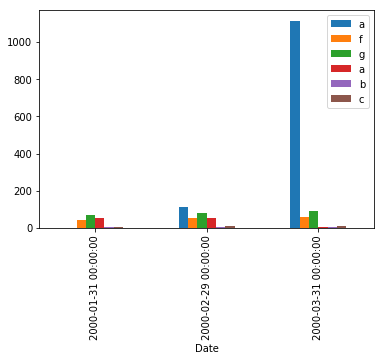

In [99]:
df98.plot(kind='bar') #simplemente el metodo plot escupe el grafico con tipo=barra

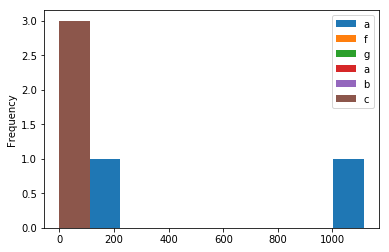

In [107]:
df98.plot.hist()